In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

In [15]:
df = pd.read_csv('iris-dataset.csv', header=None)

In [16]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Dataset Info
The dataset includes 150 samples, 50 from each of the tree species:
- α) Setosa
- β) Versicolor
- γ) Virginica

For each sample the dataset includes four features:
- A) sepal length
- B) sepal width
- C) petal length
- D) petal width

For a classification problem using the specieas as the classes, we can load the data for 2 or 3 classes and 1-4 of the features.

For the purpose of this assignment these are the following 4 combinations of features that will be used: **A**, **AD**, **BCD**, and **ABCD**

In [63]:
# All possible loss functions
loss_functions = ['hinge', 'log_loss', 'perceptron', 'squared_hinge']
overall_accuracies = []

# One Feature: A (Sepal Length)

In [64]:
sepal_length_data = df[["SepalLength"]]
sepal_length_target = df["Species"]
sepal_length_accuracies = {}

for loss in loss_functions:
    # create an instance of the model
    model = SGDClassifier(loss=loss)
    
    # fit the dataset to the model
    model.fit(sepal_length_data, sepal_length_target)
    
    #evaluate the model using the entirety of the dataset
    accuracy = model.score(sepal_length_data, sepal_length_target)
    sepal_length_accuracies[loss] = accuracy
for loss, acc in sepal_length_accuracies.items():
    print(f"Loss function: {loss}, Accuracy: {acc:.2f}")

overall_accuracies.append(sepal_length_accuracies)

Loss function: hinge, Accuracy: 0.62
Loss function: log_loss, Accuracy: 0.64
Loss function: perceptron, Accuracy: 0.39
Loss function: squared_hinge, Accuracy: 0.66


# Two Features: AD (Sepal Length and Petal Width)

In [65]:
data = df[["SepalLength", "PetalWidth"]]
target = df["Species"]
accuracies = {}

for loss in loss_functions:
    # create an instance of the model
    model = SGDClassifier(loss=loss)

    # fit the dataset to the model
    model.fit(data, target)

    # evaluate the model using the entirety of the dataset
    accuracy = model.score(data, target)
    accuracies[loss] = accuracy
for loss, acc in accuracies.items():
    print(f"Loss function: {loss}, Accuracy: {acc:.2f}")
    
overall_accuracies.append(accuracies)

Loss function: hinge, Accuracy: 0.83
Loss function: log_loss, Accuracy: 0.87
Loss function: perceptron, Accuracy: 0.81
Loss function: squared_hinge, Accuracy: 0.93


# Three Features: BCD (Sepal Width, Petal Length, and Petal Width)

In [66]:
data = df[["SepalWidth", "PetalLength", "PetalWidth"]]
target = df["Species"]
accuracies = {}

for loss in loss_functions:
    # create an instance of the model
    model = SGDClassifier(loss=loss)

    # fit the dataset to the model
    model.fit(data, target)

    # evaluate the model using the entirety of the dataset
    accuracy = model.score(data, target)
    accuracies[loss] = accuracy
for loss, acc in accuracies.items():
    print(f"Loss function: {loss}, Accuracy: {acc:.2f}")
    
overall_accuracies.append(accuracies)

Loss function: hinge, Accuracy: 0.90
Loss function: log_loss, Accuracy: 0.89
Loss function: perceptron, Accuracy: 0.95
Loss function: squared_hinge, Accuracy: 0.91


# Four Features: All Features

In [67]:
# target should only be the first 4 columns which have features -> get rid of the last column which is the target
data = df.iloc[:, :-1]
target = df["Species"]
accuracies = {}

for loss in loss_functions:
    # create an instance of the model
    model = SGDClassifier(loss=loss)

    # fit the dataset to the model
    model.fit(data, target)

    # evaluate the model using the entirety of the dataset
    accuracy = model.score(data, target)
    accuracies[loss] = accuracy
for loss, acc in accuracies.items():
    print(f"Loss function: {loss}, Accuracy: {acc:.2f}")
    
overall_accuracies.append(accuracies)

Loss function: hinge, Accuracy: 0.69
Loss function: log_loss, Accuracy: 0.74
Loss function: perceptron, Accuracy: 0.94
Loss function: squared_hinge, Accuracy: 0.85


# Evaluation
Here I compare the accuracy of the 16 features/loss-function pairs and include visualizations

In [68]:
print(overall_accuracies)

[{'hinge': 0.62, 'log_loss': 0.64, 'perceptron': 0.38666666666666666, 'squared_hinge': 0.66}, {'hinge': 0.8266666666666667, 'log_loss': 0.8666666666666667, 'perceptron': 0.8133333333333334, 'squared_hinge': 0.9333333333333333}, {'hinge': 0.9, 'log_loss': 0.8866666666666667, 'perceptron': 0.9466666666666667, 'squared_hinge': 0.9066666666666666}, {'hinge': 0.6866666666666666, 'log_loss': 0.74, 'perceptron': 0.94, 'squared_hinge': 0.8533333333333334}]


In [73]:
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
features = ['A', 'AD', 'BCD', 'ABCD']
formatted_data = {}

for i, feature_label in enumerate(features):
    # Initialize a list to hold accuracies for the current feature set
    formatted_data[feature_label] = []
    for loss_function in loss_functions:
        # Append the accuracy for each loss function in the order specified by `loss_functions`
        formatted_data[feature_label].append(overall_accuracies[i][loss_function])


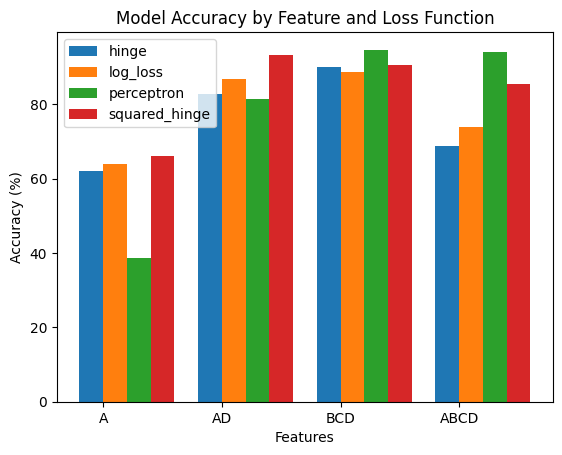

In [81]:
fig, ax = plt.subplots()

pos = np.arange(len(features))
bar_width = 0.2
# Plotting each loss_function's accuracy per feature
for i, loss_fn in enumerate(loss_functions):
    accuracies = [formatted_data[feature][i]*100 for feature in features]
    ax.bar(pos + i * bar_width, accuracies, bar_width, label=loss_fn)

ax.set_xlabel('Features')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy by Feature and Loss Function')
ax.set_xticks(pos + bar_width / 2)
ax.set_xticklabels(features)
ax.legend()